<a href="https://colab.research.google.com/github/sxs001/L4DA_resources/blob/main/sarima_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file='./jj.csv'

In [2]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
#from tqdm import tqdm_notebook
from tqdm.notebook import tqdm
import tqdm as tqdm
import numpy as np
import pandas as pd
from itertools import product

In [3]:
url='https://raw.githubusercontent.com/tdmhub/L4DA_resources/main/jj.csv'
data = pd.read_csv(url,delimiter=',')
data.head(3)


,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85


In [4]:
print(data)

          date   data
0   1960-01-01   0.71
1   1960-04-01   0.63
2   1960-07-02   0.85
3   1960-10-01   0.44
4   1961-01-01   0.61
..         ...    ...
79  1979-10-01   9.99
80  1980-01-01  16.20
81  1980-04-01  14.67
82  1980-07-02  16.02
83  1980-10-01  11.61

[84 rows x 2 columns]


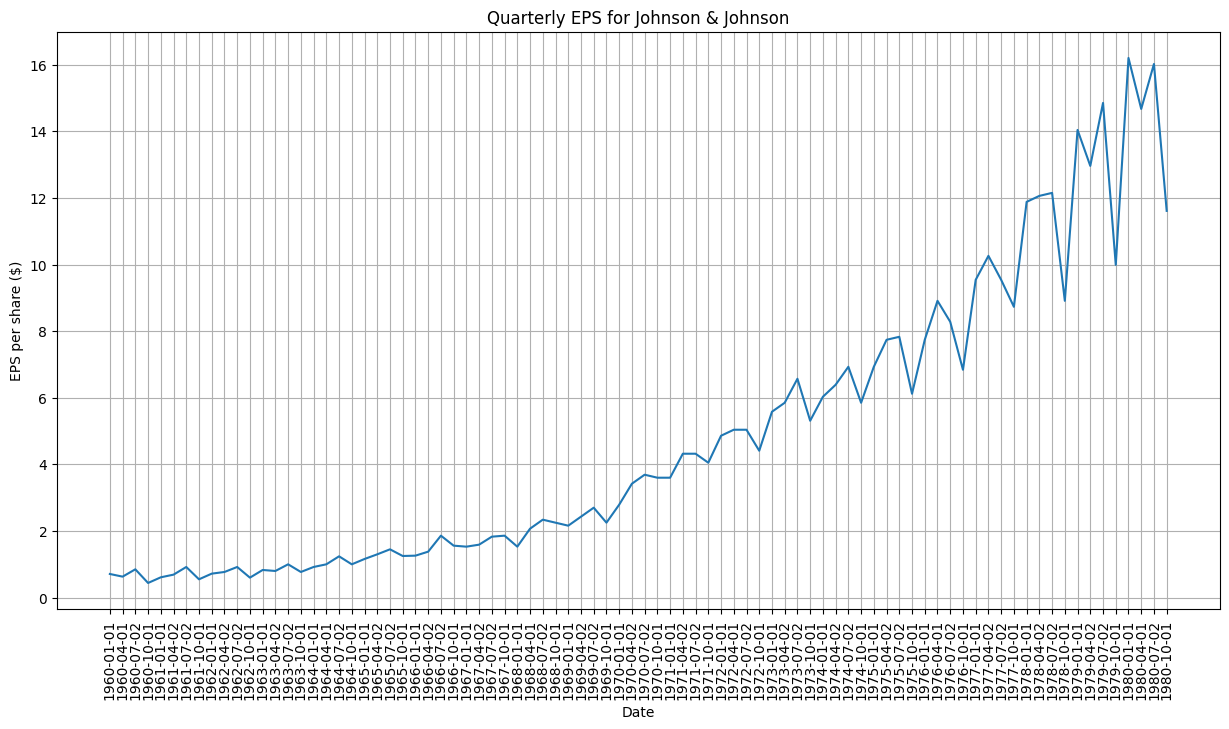

In [5]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['date'], data['data'])
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

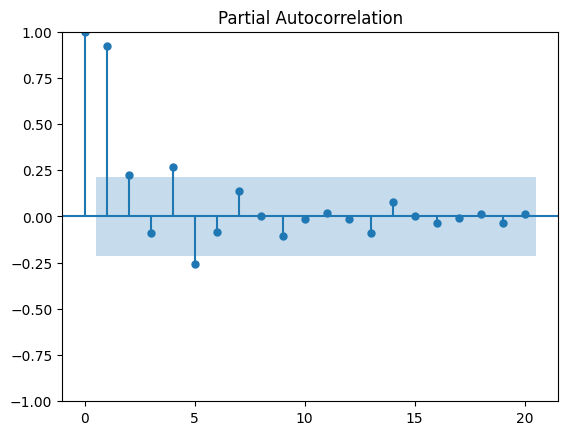

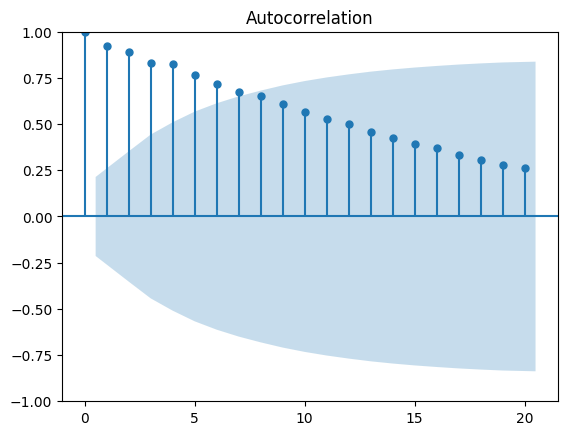

In [6]:
plot_pacf(data['data']);
plot_acf(data['data']);

ACF gradually decreasing
PACF cuts after x lag.
Suggests AR (x)


ACF cuts after x lag  
PACF gradual decresaing
MA(x)



In [7]:
ad_fuller_result = adfuller(data['data'])
alpha=0.05
print("======= ADF raw results=====")
print(ad_fuller_result)
print("======= ADF raw results=====")
adf_statistic_result = adfuller(data['data'])
adf_statistic=ad_fuller_result[0]
p_value=ad_fuller_result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
if (p_value < alpha):
    print(f'series is stationary p_value={p_value}')
else:
    print(f'series is NOT stationary p_value={p_value}')

======= ADF raw results=====
(2.7420165734574744, 1.0, 11, 72, {'1%': -3.524624466842421, '5%': -2.9026070739026064, '10%': -2.5886785262345677}, 82.63760283301104)
======= ADF raw results=====
ADF Statistic: 2.7420165734574744
p-value: 1.0
series is NOT stationary p_value=1.0


In [8]:
data.columns

Index(['date', 'data'], dtype='object')

In [9]:
data_diff_series=data['data'].diff(1)

In [10]:
data_diff_df=pd.concat([data['date'], data_diff_series], axis=1).reset_index()

In [11]:
data_diff_df


,index,date,data
0,0,1960-01-01,NaN
1,1,1960-04-01,-0.08
2,2,1960-07-02,0.22
3,3,1960-10-01,-0.41
4,4,1961-01-01,0.17
...,...,...,...
79,79,1979-10-01,-4.86
80,80,1980-01-01,6.21
81,81,1980-04-01,-1.53
82,82,1980-07-02,1.35


In [12]:
data_diff_df=data_diff_df.dropna()


In [13]:
data_diff_df

,index,date,data
1,1,1960-04-01,-0.08
2,2,1960-07-02,0.22
3,3,1960-10-01,-0.41
4,4,1961-01-01,0.17
5,5,1961-04-02,0.08
...,...,...,...
79,79,1979-10-01,-4.86
80,80,1980-01-01,6.21
81,81,1980-04-01,-1.53
82,82,1980-07-02,1.35


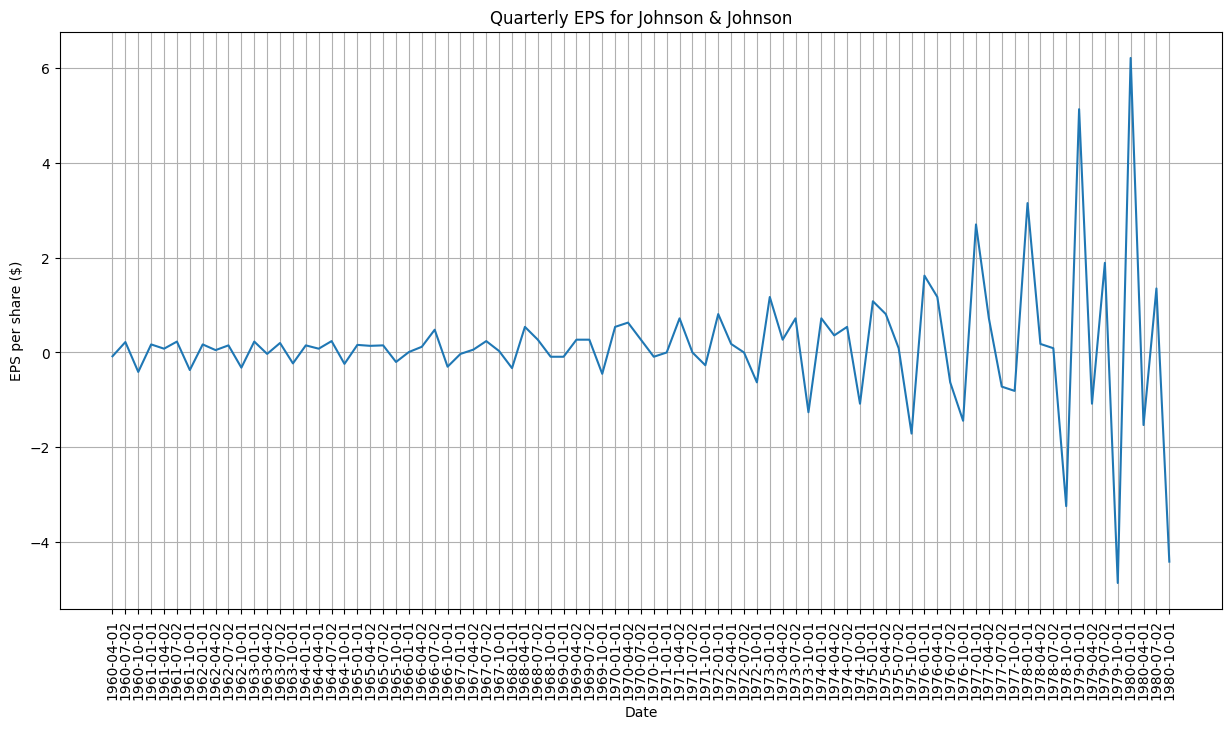

In [14]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data_diff_df['date'], data_diff_df['data'])
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [15]:
ad_fuller_result = adfuller(data_diff_df['data'])
alpha=0.05
print("======= ADF raw results=====")
print(ad_fuller_result)
print("======= ADF raw results=====")
adf_statistic=ad_fuller_result[0]
p_value=ad_fuller_result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
if (p_value < alpha):
    print(f'series is stationary p_value={p_value}')
else:
    print(f'series is NOT stationary p_value={p_value}')

======= ADF raw results=====
(-0.40740976363804615, 0.9088542416911305, 10, 72, {'1%': -3.524624466842421, '5%': -2.9026070739026064, '10%': -2.5886785262345677}, 89.21317134038213)
======= ADF raw results=====
ADF Statistic: -0.40740976363804615
p-value: 0.9088542416911305
series is NOT stationary p_value=0.9088542416911305


In [16]:
ad_fuller_result[1]

0.9088542416911305

Still not stationary therefore take the log - looks like increaseing sd over sample

In [17]:
#data_diff_series = np.log(data_diff_df['data'])
data_log_series = np.log(data['data'])
data_diff_and_log_df=pd.concat([data['date'], data_log_series], axis=1).reset_index()


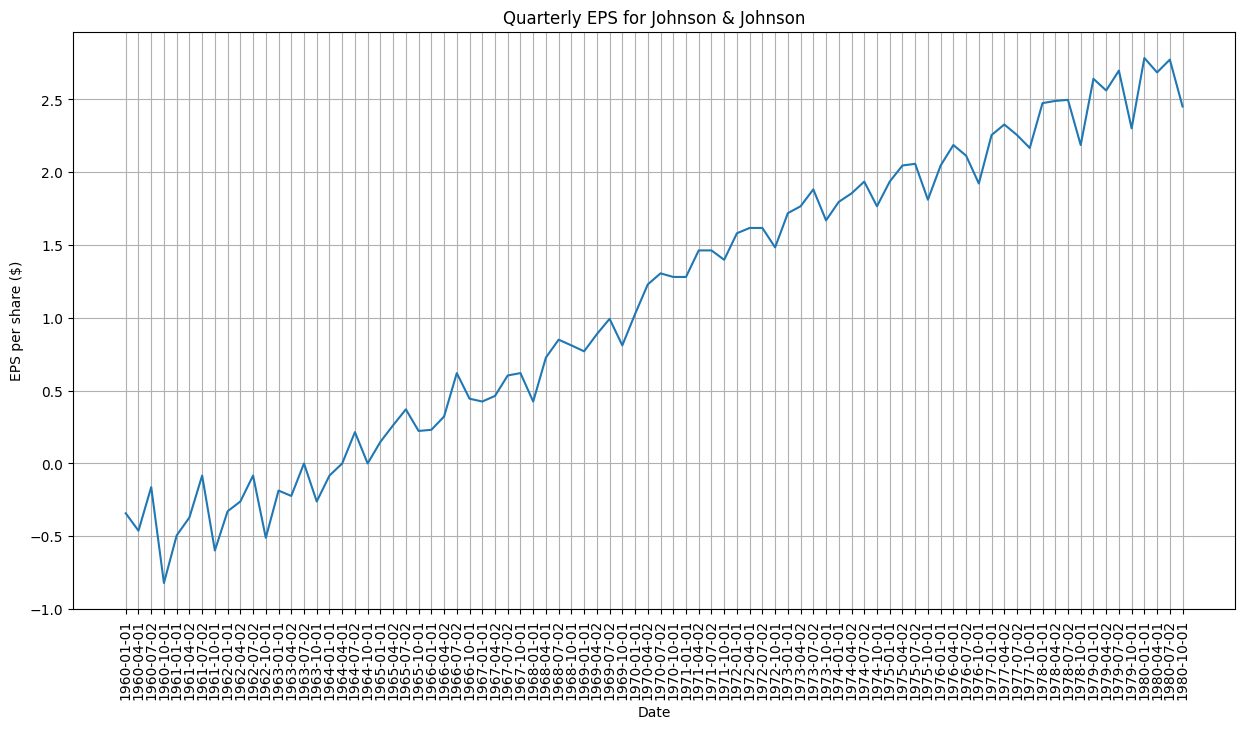

In [18]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data_diff_and_log_df['date'], data_diff_and_log_df['data'])
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Amplitude compressed using log but still increasing

In [19]:
#Data querterly therefore take the first from forth to give stationary series
data_log_diff_series=data_log_series.diff(4)
data_log_diff_df=pd.concat([data['date'], data_log_diff_series], axis=1).reset_index()
data_log_diff_df=data_log_diff_df.dropna()

In [20]:
data_log_diff_df

,index,date,data
4,4,1961-01-01,-0.151806
5,5,1961-04-02,0.090972
6,6,1961-07-02,0.079137
7,7,1961-10-01,0.223144
8,8,1962-01-01,0.165792
...,...,...,...
79,79,1979-10-01,0.114410
80,80,1980-01-01,0.143101
81,81,1980-04-01,0.123937
82,82,1980-07-02,0.075838


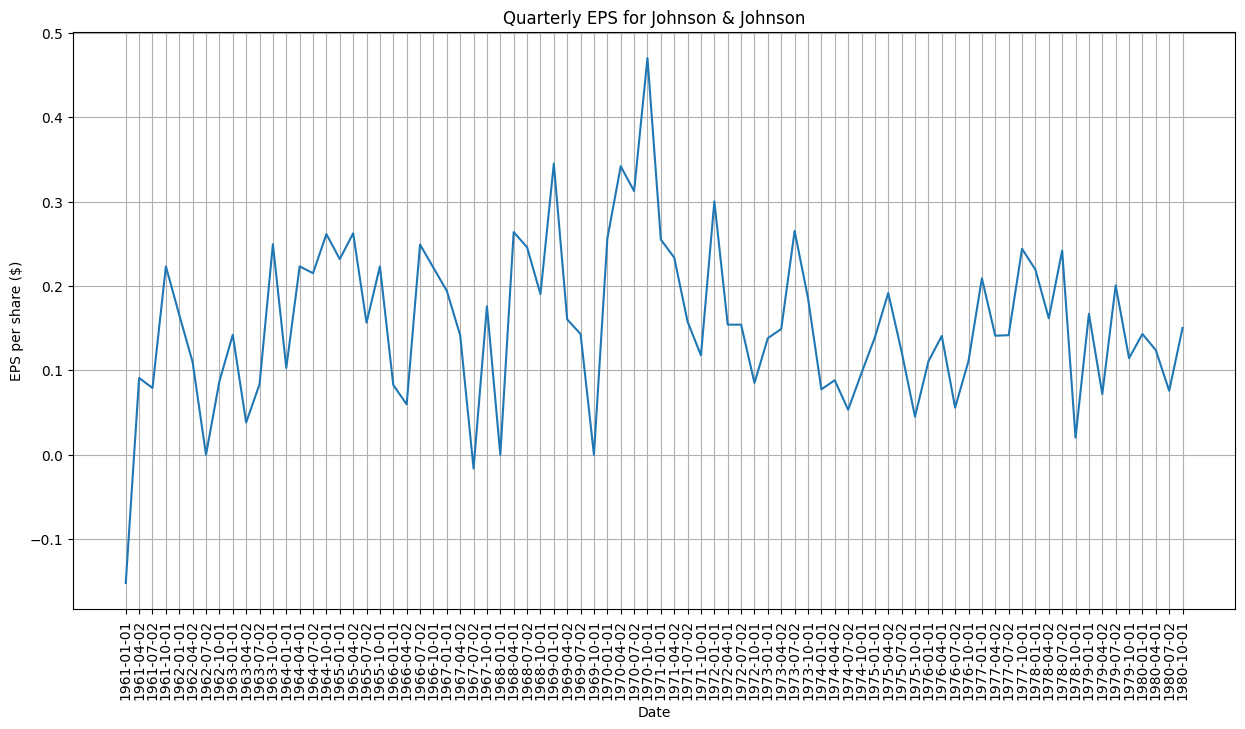

In [21]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data_log_diff_df['date'], data_log_diff_df['data'])
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
ad_fuller_result = adfuller(data_log_diff_df['data'])
alpha=0.05
print("======= ADF raw results=====")
print(ad_fuller_result)
print("======= ADF raw results=====")
adf_statistic=ad_fuller_result[0]
p_value=ad_fuller_result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
if (p_value < alpha):
    print(f'series is stationary p_value={p_value}')
else:
    print(f'series is NOT stationary p_value={p_value}')

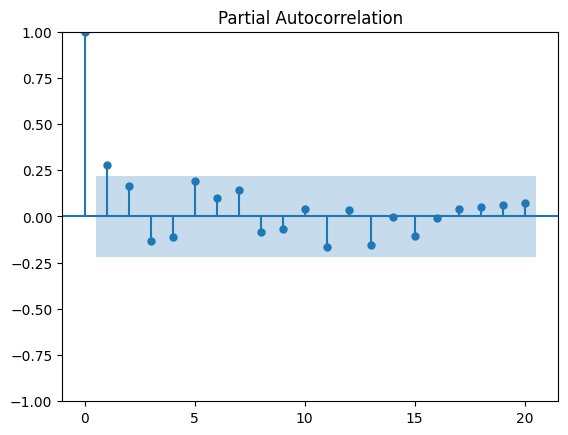

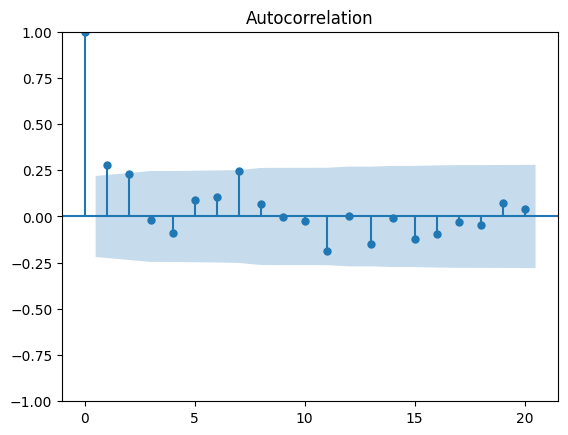

In [22]:
plot_pacf(data_log_diff_df['data']);
plot_acf(data_log_diff_df['data']);

PACF that we have a significant peak at lag 1
suggests an AR(1)

Another peak at lag 4,
seasonal autoregressive process of order 1 (P = 1).

ACF plot significant peak at lag 1
suggesting a non-seasonal MA(1) process.

However use multiple parameters and AIC to measure

In [23]:
def optimize_SARIMA(parameters_list, d, D, s, data):
    """
        Return dataframe with parameters, corresponding AIC and SSE

        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """

    results = []

    #for param in tqdm.notebook.tqdm(parameters_list):
    for param in parameters_list:
        try:
            model = SARIMAX(data, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue

        aic = model.aic
        results.append([param, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [29]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 2)
D = 1
Q = range(0, 4, 2)
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

64
64


In [30]:
result_df=optimize_SARIMA(parameters_list, d, D, s, data['data'])
print(result_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

     (p,q)x(P,Q)         AIC
0   (2, 3, 0, 0)   92.586638
1   (3, 3, 0, 0)   94.470040
2   (2, 3, 0, 2)   95.173305
3   (2, 3, 2, 0)   95.295084
4   (3, 2, 0, 2)   95.629877
..           ...         ...
59  (2, 0, 2, 2)  107.182031
60  (0, 0, 0, 2)  141.971362
61  (0, 0, 2, 0)  143.331668
62  (0, 0, 2, 2)  143.654663
63  (0, 0, 0, 0)  145.581196

[64 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
print(result_df)
result_df[result_df['AIC'] == result_df['AIC'].min()]

     (p,q)x(P,Q)         AIC
0   (2, 3, 0, 0)   92.586638
1   (3, 3, 0, 0)   94.470040
2   (2, 3, 0, 2)   95.173305
3   (2, 3, 2, 0)   95.295084
4   (3, 2, 0, 2)   95.629877
..           ...         ...
59  (2, 0, 2, 2)  107.182031
60  (0, 0, 0, 2)  141.971362
61  (0, 0, 2, 0)  143.331668
62  (0, 0, 2, 2)  143.654663
63  (0, 0, 0, 0)  145.581196

[64 rows x 2 columns]


,"(p,q)x(P,Q)",AIC
0,"(2, 3, 0, 0)",92.586638


In [49]:
#best_model = SARIMAX(data['data'], order=(2, d, 3), seasonal_order=(1, D, 0, 4)).fit(dis=-1)
best_model = SARIMAX(data['data'], order=(2, d, 3), seasonal_order=(0, D, 0, 4)).fit(dis=-1)
print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


                                     SARIMAX Results                                      
Dep. Variable:                               data   No. Observations:                   84
Model:             SARIMAX(2, 1, 3)x(0, 1, [], 4)   Log Likelihood                 -40.293
Date:                            Fri, 12 Jan 2024   AIC                             92.587
Time:                                    16:38:38   BIC                            106.803
Sample:                                         0   HQIC                            98.282
                                             - 84                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4833      0.116    -12.823      0.000      -1.710      -1.257
ar.L2         -0.7892      0.131   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<ipython-input-50-af22f798eb0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['arima_model'][:4+1] = np.NaN


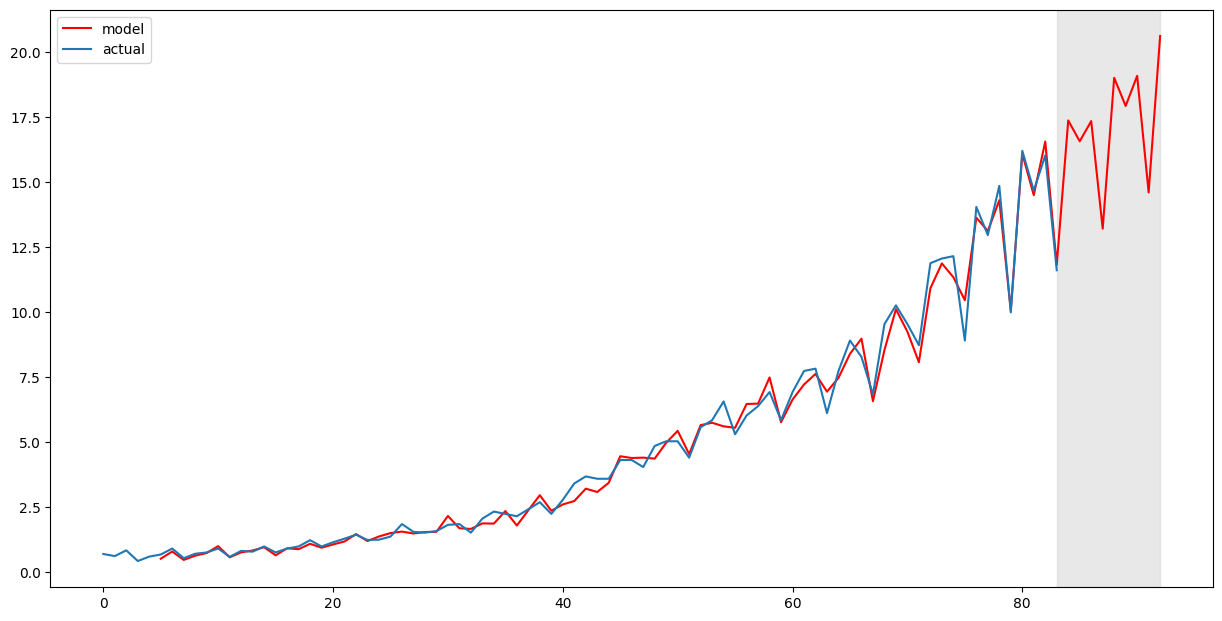

In [50]:
data['arima_model'] = best_model.fittedvalues
data['arima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=data.shape[0], end=data.shape[0] + 8)
#forecast = data['arima_model'].append(forecast)
forecast = pd.concat([data['arima_model'], forecast])
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(data['data'], label='actual')
plt.legend()
plt.show()